## Data preparation

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/users/ouyang/desktop/CSE7324MachineLearning/Datasets/Churn_Modelling.csv')
df.head()

# define different catagories according to age range
df['Age_range'] = pd.cut(df.Age, [0,20,30,50,1e6], labels=['teenager','young_adult','adult','senior'])

# reset the order of columns
column_name = ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Age_range', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']
df = df[column_name]

# drop the nan values
# df.replace(to_replace='?', value=np.nan, inplace=True)
df.dropna(inplace=True)
df.reset_index()

# The 'Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember' 
# can be treated as categorical features

# df['Tenure'] = df['Tenure'].astype('object')
# df['NumOfProducts'] = df['NumOfProducts'].astype('object')
# df['HasCrCard'] = df['HasCrCard'].astype('object')
# df['IsActiveMember'] = df['IsActiveMember'].astype('object')
df['Age_range'] = df['Age_range'].astype('object')
# df['Exited'] = df['Exited'].astype('object')

toconvert_columns = ['Tenure','NumOfProducts', 'HasCrCard', 'IsActiveMember','Exited']
for col in toconvert_columns:
    tmplist = [str(x) for x in df[col]]
    df.loc[:,col] = tmplist

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Age_range,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,adult,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,adult,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,adult,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,adult,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,adult,2,125510.82,1,1,1,79084.10,0


In [2]:
from sklearn.model_selection import train_test_split

df_train_orig, df_test_orig = train_test_split(df, test_size = 0.2)
df_train_orig.reset_index(inplace=True)
df_test_orig.reset_index(inplace=True)

df_train_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
index              8000 non-null int64
RowNumber          8000 non-null int64
CustomerId         8000 non-null int64
Surname            8000 non-null object
CreditScore        8000 non-null int64
Geography          8000 non-null object
Gender             8000 non-null object
Age                8000 non-null int64
Age_range          8000 non-null object
Tenure             8000 non-null object
Balance            8000 non-null float64
NumOfProducts      8000 non-null object
HasCrCard          8000 non-null object
IsActiveMember     8000 non-null object
EstimatedSalary    8000 non-null float64
Exited             8000 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 1000.1+ KB


In [3]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# X = np.array(df.iloc[:,:14])
# y = np.array(df.iloc[:,-1])

# # split data into training and testing set
# X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X,y,test_size = 0.2)

In [4]:
# rebuild the train dataframe and test dataframe
# columns_orig = df.columns
# df_train_orig = pd.DataFrame(data=np.hstack((X_train_orig,y_train_orig.reshape(-1,1))),
#                        columns=columns_orig)
# df_test_orig = pd.DataFrame(data=np.hstack((X_test_orig,y_test_orig.reshape(-1,1))),
#                        columns=columns_orig)

In [5]:
# make copy of dataframe
from copy import deepcopy
df_train = deepcopy(df_train_orig)
df_test = deepcopy(df_test_orig)

In [6]:
# get rid of rows with any missing data and reset the index
# df_train['Tenure'] = df['Tenure'].astype('object')
# df_train.replace(to_replace='?', value=np.nan, inplace=True)
# df_train.dropna(inplace=True)
# df_train.reset_index()

# # df_test['Tenure'] = df['Tenure'].astype('object')
# df_test.replace(to_replace='?', value=np.nan, inplace=True)
# df_test.dropna(inplace=True)
# df_test.reset_index()
print(df_train['Tenure'][0])
type(df_train['Tenure'][0])

2


str

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
index              8000 non-null int64
RowNumber          8000 non-null int64
CustomerId         8000 non-null int64
Surname            8000 non-null object
CreditScore        8000 non-null int64
Geography          8000 non-null object
Gender             8000 non-null object
Age                8000 non-null int64
Age_range          8000 non-null object
Tenure             8000 non-null object
Balance            8000 non-null float64
NumOfProducts      8000 non-null object
HasCrCard          8000 non-null object
IsActiveMember     8000 non-null object
EstimatedSalary    8000 non-null float64
Exited             8000 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 1000.1+ KB


In [8]:
# df_train.loc[:,'Tenure'] = [str(x) for x in list(df_train['Tenure'])]
# df_test.loc[:,'Tenure'] = [str(x) for x in list(df_test['Tenure'])]

## Processing

* Encode the categorical data features as integers (later do one hot encode)

* StandardScale the continuous data

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

encoders = dict()
categorical_headers = ['Geography', 'Gender', 'Age_range', 'Tenure',
                      'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# train all encoders (special case the target 'Exited')
for col in categorical_headers + ['Exited']:
#     df_train[col] = df_train[col].str.strip()
#     df_test[col] = df_test[col].str.strip()
#     print(df_test.isnull().any())
    if col=='Exited':
        tmp = LabelEncoder()
        df_train[col] = tmp.fit_transform(df_train[col])
        df_test[col] = tmp.transform(df_test[col])
    else:
        # integer encoded variables
        encoders[col] = LabelEncoder()
        df_train[col+'_int'] = encoders[col].fit_transform(df_train[col])
        df_test[col+'_int'] = encoders[col].transform(df_test[col])

# scale the numeric, continuous data
numeric_headers = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

for col in numeric_headers:
    df_train[col] = df_train[col].astype(np.float)
    df_test[col] = df_test[col].astype(np.float)
    
    ss = StandardScaler()
    df_train[col] = ss.fit_transform(df_train[col].values.reshape(-1,1))
    df_test[col] = ss.transform(df_test[col].values.reshape(-1,1))

df_train.head()

,index,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Age_range,Tenure,...,IsActiveMember,EstimatedSalary,Exited,Geography_int,Gender_int,Age_range_int,Tenure_int,NumOfProducts_int,HasCrCard_int,IsActiveMember_int
0,138,139,15594408,Chia,-0.699638,Spain,Female,0.864555,adult,2,...,0,-0.444802,1,2,0,0,3,0,1,0
1,8446,8447,15630511,Picot,0.415379,France,Female,-0.568469,adult,6,...,0,1.106385,0,0,0,0,7,1,1,0
2,3268,3269,15611430,Abramowitz,0.404958,France,Male,1.437765,senior,5,...,0,-1.531925,1,0,1,1,6,0,1,0
3,1463,1464,15669293,Hovell,-1.397826,France,Male,-0.186329,adult,5,...,1,-1.206216,0,0,1,0,6,0,0,1
4,3186,3187,15649668,Wilhelm,-0.147340,Germany,Female,-0.281864,adult,10,...,1,-0.069722,0,1,0,0,2,1,1,1


In [10]:
# let's start as simply as possible, without any feature preprocessing
categorical_headers_ints = [x+'_int' for x in categorical_headers]

# we will forego one-hot encoding right now and instead just scale all inputs
#   this is just to get an example running in Keras (don't ever do this)
feature_columns = categorical_headers_ints+numeric_headers
X_train =  ss.fit_transform(df_train[feature_columns].values).astype(np.float32)
X_test =  ss.transform(df_test[feature_columns].values).astype(np.float32)

y_train = df_train['Exited'].values.astype(np.int)
y_test = df_test['Exited'].values.astype(np.int)

print(feature_columns)

['Geography_int', 'Gender_int', 'Age_range_int', 'Tenure_int', 'NumOfProducts_int', 'HasCrCard_int', 'IsActiveMember_int', 'Age', 'CreditScore', 'Balance', 'EstimatedSalary']


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 23 columns):
index                 8000 non-null int64
RowNumber             8000 non-null int64
CustomerId            8000 non-null int64
Surname               8000 non-null object
CreditScore           8000 non-null float64
Geography             8000 non-null object
Gender                8000 non-null object
Age                   8000 non-null float64
Age_range             8000 non-null object
Tenure                8000 non-null object
Balance               8000 non-null float64
NumOfProducts         8000 non-null object
HasCrCard             8000 non-null object
IsActiveMember        8000 non-null object
EstimatedSalary       8000 non-null float64
Exited                8000 non-null int64
Geography_int         8000 non-null int64
Gender_int            8000 non-null int64
Age_range_int         8000 non-null int64
Tenure_int            8000 non-null int64
NumOfProducts_int     8000 non-null i

## Use Keras and TensorFlow

In [12]:
from sklearn import metrics as mt
import keras

keras.__version__

Using TensorFlow backend.


'2.2.4'

In [13]:
# from keras.models import Sequential
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Concatenate
from keras.models import Model

In [14]:
# combine the features into a single large matrix
X_train = df_train[feature_columns].values
X_test = df_test[feature_columns].values

# This returns a tensor
inputs = Input(shape=(X_train.shape[1],))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(units=10, activation='relu')(inputs)
x = Dense(units=5, activation='tanh')(x)
predictions = Dense(1,activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

In [15]:
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [16]:
%%time

model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=0)

from sklearn import metrics as mt
yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[1607    3]
 [ 389    1]] 0.804
CPU times: user 1.65 s, sys: 561 ms, total: 2.21 s
Wall time: 1.06 s


## One Hot Encoding Categorical Data

In [17]:
# but we were dealing with the data incorrectly because we didn't one hot encode the 
#   categorical features
from sklearn.preprocessing import OneHotEncoder

# now let's encode the integer outputs as one hot encoded labels
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(df_train[categorical_headers_ints].values)
X_test_ohe = ohe.transform(df_test[categorical_headers_ints].values)

# the ohe instance will help us to organize our encoded matrix
print(ohe.feature_indices_)
print(X_train_ohe.shape)
print(type(X_train_ohe), '========THIS IS SPARSE ENCODED=======')

[ 0  3  5  9 20 24 26 28]
(8000, 28)
<class 'scipy.sparse.csr.csr_matrix'> ========THIS IS SPARSE ENCODED=======


In [18]:
# This returns a tensor
# the input can only be a scipy.sparse array
inputs = Input(shape=(X_train_ohe.shape[1],), sparse=True)

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(units=10, activation='relu')(inputs)
predictions = Dense(1,activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                290       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [19]:
%%time
model.fit(X_train_ohe,y_train, epochs=10, batch_size=50, verbose=0)

# test on the data
yhat = np.round(model.predict(X_test_ohe))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[1610    0]
 [ 386    4]] 0.807
CPU times: user 2.5 s, sys: 420 ms, total: 2.92 s
Wall time: 2.08 s


## Multi-model Networks: Combine Branches, Sparse and Dense

In [20]:
# combine the features with two branches
from keras.layers import concatenate

# let's encode the integer outputs as one hot encoded labels
ohe = OneHotEncoder()
X_train_ohe = ohe.fit_transform(df_train[categorical_headers_ints].values)
X_test_ohe = ohe.transform(df_test[categorical_headers_ints].values)

# and save off the numeric features
X_train_num =  df_train[numeric_headers].values
X_test_num = df_test[numeric_headers].values

# create sparse input branch for ohe
inputsSparse = Input(shape=(X_train_ohe.shape[1],),sparse=True, name='X_ohe')
xSparse = Dense(units=10, activation='relu', name='ohe_1')(inputsSparse)

# create dense input branch for numeric
inputsDense = Input(shape=(X_train_num.shape[1],),sparse=False, name='X_Numeric')
xDense = Dense(units=10, activation='relu',name='num_1')(inputsDense)

x = concatenate([xSparse, xDense], name='concat')
predictions = Dense(1,activation='sigmoid', name='combined')(x)

# This creates a model that includes
# the Input layer and Dense layers
model = Model(inputs=[inputsSparse,inputsDense], outputs=predictions)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
X_ohe (InputLayer)              (None, 28)           0                                            
__________________________________________________________________________________________________
X_Numeric (InputLayer)          (None, 4)            0                                            
__________________________________________________________________________________________________
ohe_1 (Dense)                   (None, 10)           290         X_ohe[0][0]                      
__________________________________________________________________________________________________
num_1 (Dense)                   (None, 10)           50          X_Numeric[0][0]                  
__________________________________________________________________________________________________
concat (Co

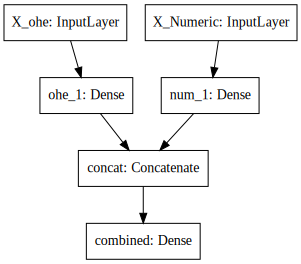

In [21]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [22]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit([ X_train_ohe, X_train_num ], # inputs for each branch are a list
          y_train, 
          epochs=10, 
          batch_size=50, 
          verbose=0)

yhat = model.predict([X_test_ohe,
                      X_test_num]) # each branch has an input

yhat = np.round(yhat)
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[1606    4]
 [ 383    7]] 0.8065
CPU times: user 2.72 s, sys: 510 ms, total: 3.23 s
Wall time: 2.18 s


## Crossed Columns and Deep Embeddings

### 1. Use Dense embeddings

In [23]:
# we need to create separate sequential models for each embedding
embed_branches = []
X_ints_train = [] # keep track of inputs for each branch
X_ints_test = []# keep track of inputs for each branch
all_inputs = [] # this is what we will give to keras.Model inputs
all_branch_outputs = [] # this is where we will keep track of output of each branch

for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append( inputs ) # keep track of created inputs
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_branch_outputs.append(x)

# also get a dense branch of the numeric features
all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False, name='numeric'))
x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
all_branch_outputs.append( Dense(units=10,activation='relu', name='numeric_2')(x) )

# merge the branches together
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1,activation='sigmoid', name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Geography_int (InputLayer)      (None, 1)            0                                            
__________________________________________________________________________________________________
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
Age_range_int (InputLayer)      (None, 1)            0                                            
__________________________________________________________________________________________________
Tenure_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
NumOfProdu

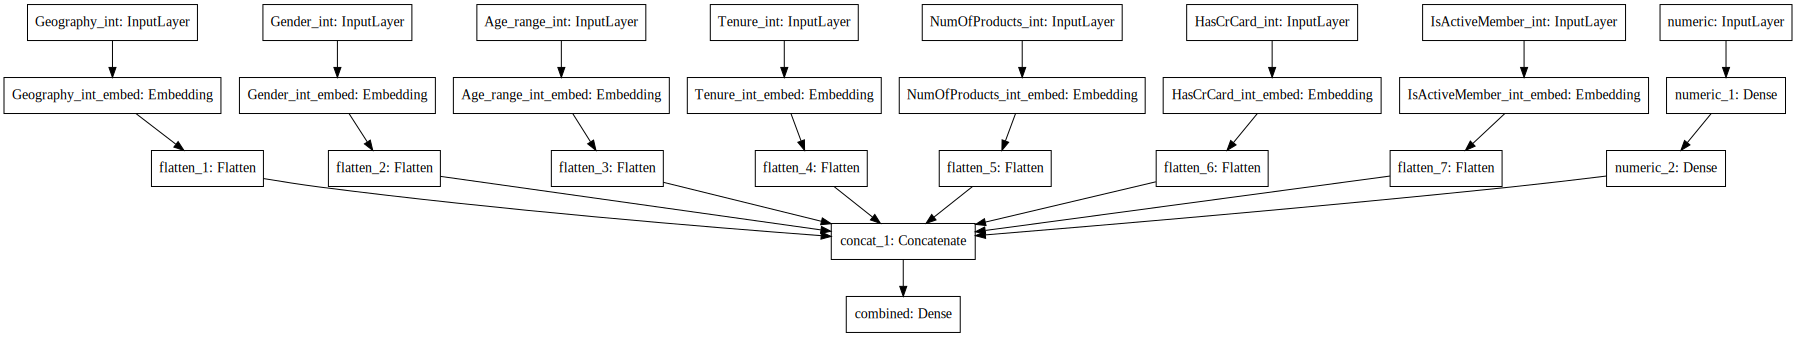

In [24]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [25]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_ints_train + [X_train_num], # create a list of inputs for embeddings
        y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
8000/8000 [==============================] - 0s 59us/step - loss: 0.1900 - acc: 0.7937
Epoch 2/10
8000/8000 [==============================] - 0s 28us/step - loss: 0.1682 - acc: 0.7941
Epoch 3/10
8000/8000 [==============================] - 0s 28us/step - loss: 0.1605 - acc: 0.7941
Epoch 4/10
8000/8000 [==============================] - 0s 26us/step - loss: 0.1565 - acc: 0.7941
Epoch 5/10
8000/8000 [==============================] - 0s 29us/step - loss: 0.1538 - acc: 0.7941
Epoch 6/10
8000/8000 [==============================] - 0s 30us/step - loss: 0.1516 - acc: 0.7941
Epoch 7/10
8000/8000 [==============================] - 0s 28us/step - loss: 0.1497 - acc: 0.7941
Epoch 8/10
8000/8000 [==============================] - 0s 31us/step - loss: 0.1480 - acc: 0.7941
Epoch 9/10
8000/8000 [==============================] - 0s 32us/step - loss: 0.1464 - acc: 0.7941
Epoch 10/10
8000/8000 [==============================] - 0s 32us/step - loss: 0.1449 - acc: 0.7941
CPU times: user 5.1

In [26]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[1610    0]
 [ 390    0]] 0.805


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 23 columns):
index                 8000 non-null int64
RowNumber             8000 non-null int64
CustomerId            8000 non-null int64
Surname               8000 non-null object
CreditScore           8000 non-null float64
Geography             8000 non-null object
Gender                8000 non-null object
Age                   8000 non-null float64
Age_range             8000 non-null object
Tenure                8000 non-null object
Balance               8000 non-null float64
NumOfProducts         8000 non-null object
HasCrCard             8000 non-null object
IsActiveMember        8000 non-null object
EstimatedSalary       8000 non-null float64
Exited                8000 non-null int64
Geography_int         8000 non-null int64
Gender_int            8000 non-null int64
Age_range_int         8000 non-null int64
Tenure_int            8000 non-null int64
NumOfProducts_int     8000 non-null i

### 2. Making Crossed Columns

In [28]:
# 'workclass','education','marital_status',
# 'occupation','relationship','race',
# 'sex','country'

cross_columns = [['Geography','Tenure'],
                 ['HasCrCard', 'IsActiveMember'],
                 ['NumOfProducts','Age_range']]

# we will create separate sequential models for each embedding
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_branch_outputs = []

for cols in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    # 1. create crossed labels by join operation
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    # 2. encode as integers
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    
    # 3. save encodings in a list for each branch
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    # get the number of categories in the crossing
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the crossed encoding
    inputs = Input(shape=(1,),dtype='int32',name='_'.join(cols))
    all_inputs.append(inputs) # save this as input for the keras.Model
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name='_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_branch_outputs.append(x) # save for concatenating later
    
# merge the branches together
final_branch = concatenate(all_branch_outputs)
# add a layer after merging
final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

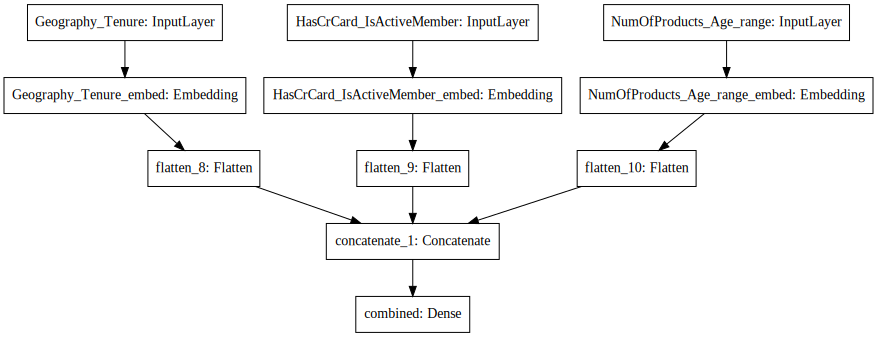

In [29]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [30]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_ints_train,
        y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
8000/8000 [==============================] - 0s 43us/step - loss: 0.2262 - acc: 0.7543
Epoch 2/10
8000/8000 [==============================] - 0s 21us/step - loss: 0.1926 - acc: 0.7941
Epoch 3/10
8000/8000 [==============================] - 0s 20us/step - loss: 0.1767 - acc: 0.7941
Epoch 4/10
8000/8000 [==============================] - 0s 22us/step - loss: 0.1685 - acc: 0.7941
Epoch 5/10
8000/8000 [==============================] - 0s 21us/step - loss: 0.1639 - acc: 0.7941
Epoch 6/10
8000/8000 [==============================] - 0s 21us/step - loss: 0.1611 - acc: 0.7941
Epoch 7/10
8000/8000 [==============================] - 0s 21us/step - loss: 0.1591 - acc: 0.7941
Epoch 8/10
8000/8000 [==============================] - 0s 20us/step - loss: 0.1577 - acc: 0.7941
Epoch 9/10
8000/8000 [==============================] - 0s 19us/step - loss: 0.1565 - acc: 0.7941
Epoch 10/10
8000/8000 [==============================] - 0s 22us/step - loss: 0.1555 - acc: 0.7941
CPU times: user 3.3

In [31]:
yhat = np.round(model.predict(X_ints_test))
print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

[[1610    0]
 [ 390    0]] 0.805


### 3. Combining Crossed Linear Classifier and Deep Embeddings

#### - 3 deep branch

In [32]:
# 'workclass','education','marital_status',
# 'occupation','relationship','race',
# 'sex','country'

cross_columns = [['Geography','Tenure'],
                 ['HasCrCard', 'IsActiveMember'],
                 ['NumOfProducts','Age_range']]

#'workclass','education','marital_status','occupation','relationship','race','sex','country'

# we need to create separate lists for each branch
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []

for cols in cross_columns:
    # encode crossed columns as ints for the embedding
    enc = LabelEncoder()
    
    # create crossed labels
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name = '_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
# merge the branches together
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1,activation='sigmoid',name='wide_combined')(wide_branch)

# reset this input branch
all_deep_branch_outputs = []
# add in the embeddings
for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
all_inputs.append(Input(shape=(X_train_num.shape[1],),
                        sparse=False,
                        name='numeric_data'))

x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
all_deep_branch_outputs.append( x )

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

# print(X_crossed_train.shape)


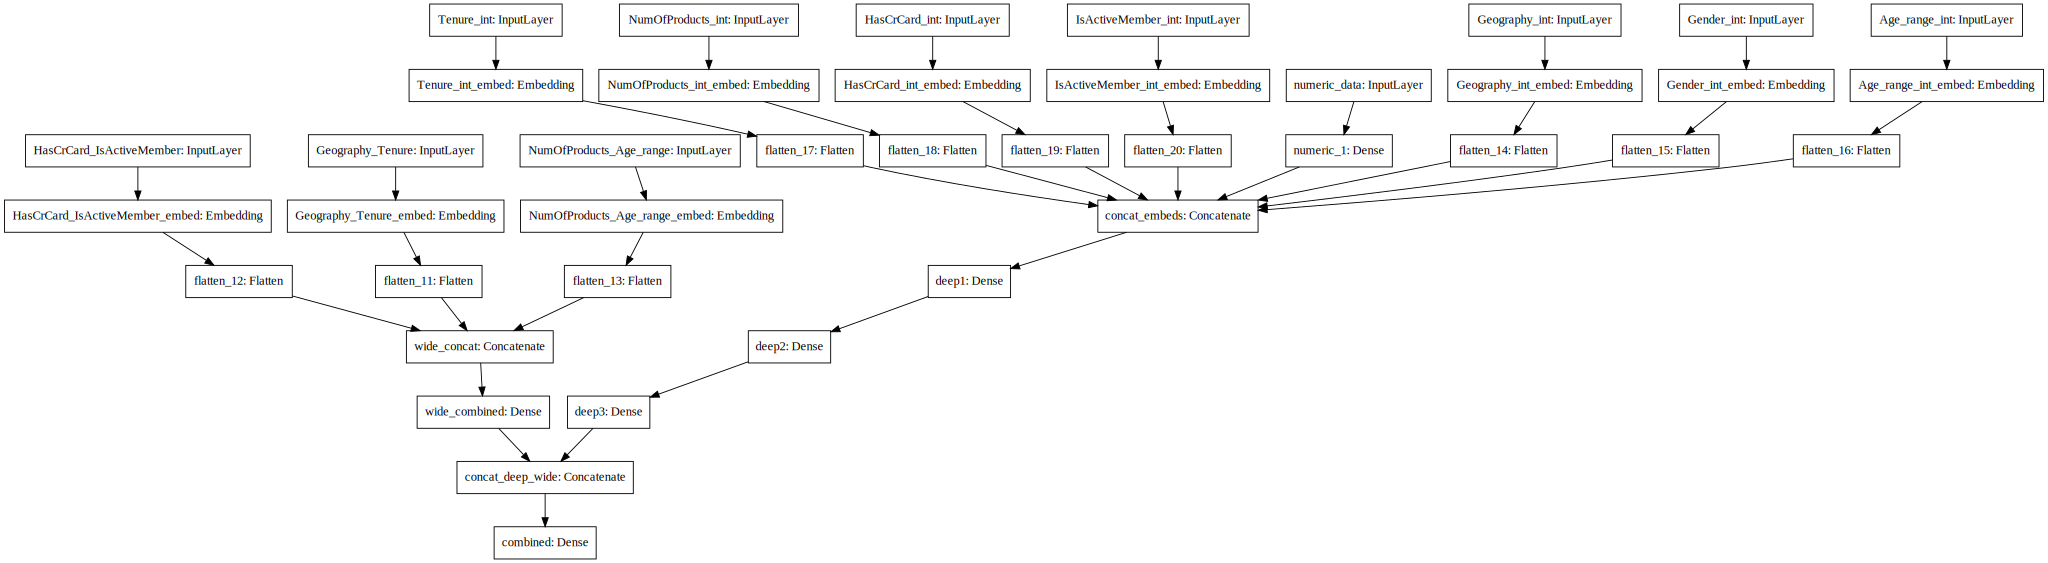

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [34]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit(X_ints_train+ [X_train_num],
                    y_train, 
                    epochs=20, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = (X_ints_test + [X_test_num], y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 115us/step - loss: 0.1326 - acc: 0.8200 - val_loss: 0.1152 - val_acc: 0.8380
Epoch 2/20
8000/8000 [==============================] - 0s 50us/step - loss: 0.1121 - acc: 0.8506 - val_loss: 0.1095 - val_acc: 0.8510
Epoch 3/20
8000/8000 [==============================] - 0s 51us/step - loss: 0.1080 - acc: 0.8554 - val_loss: 0.1069 - val_acc: 0.8580
Epoch 4/20
8000/8000 [==============================] - 0s 57us/step - loss: 0.1060 - acc: 0.8571 - val_loss: 0.1059 - val_acc: 0.8610
Epoch 5/20
8000/8000 [==============================] - 0s 56us/step - loss: 0.1049 - acc: 0.8609 - val_loss: 0.1055 - val_acc: 0.8620
Epoch 6/20
8000/8000 [==============================] - 0s 55us/step - loss: 0.1042 - acc: 0.8596 - val_loss: 0.1055 - val_acc: 0.8625
Epoch 7/20
8000/8000 [==============================] - 0s 56us/step - loss: 0.1035 - acc: 0.8603 - val_loss: 0.1048 - val_acc: 0.8625
Epoch 

In [36]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat), mt.f1_score(y_test,yhat,average='macro'))

[[1532   78]
 [ 197  193]] 0.7508018516781684


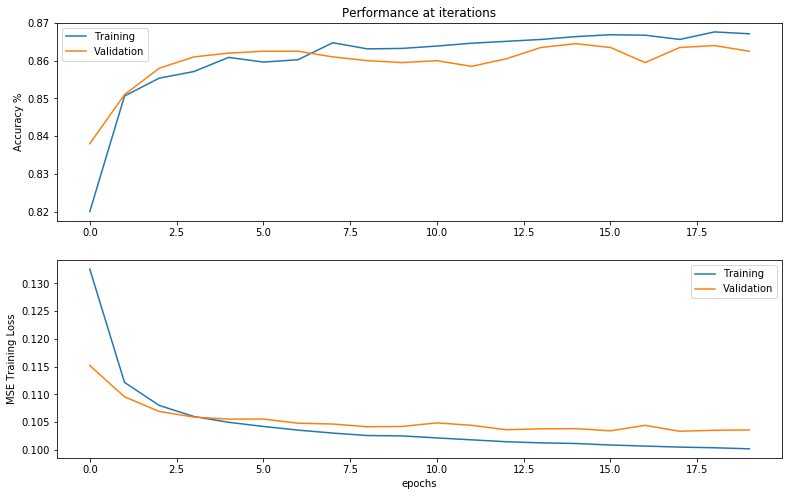

In [37]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(13,8))
plt.subplot(2,1,1)
plt.ylabel('Accuracy %')
plt.title('Performance at iterations')
plt.plot(history.history['acc'], label='Training')
plt.plot(history.history['val_acc'], label='Validation')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('MSE Training Loss')
plt.xlabel('epochs')
plt.legend()

Because f1_score has been removed from Keras since version 2.0, so we use the f1_score from sklearn

In [38]:
from sklearn.metrics import f1_score

yhat = np.round(model.predict(X_ints_test + [X_test_num]))
print('sklearn Macro-F1-Score:', f1_score(y_test, yhat, average='macro'))

sklearn Macro-F1-Score: 0.7508018516781684


#### - 4 deep branches

In [39]:
# 'workclass','education','marital_status',
# 'occupation','relationship','race',
# 'sex','country'

cross_columns = [['Geography','Tenure'],
                 ['HasCrCard', 'IsActiveMember'],
                 ['NumOfProducts','Age_range']]

#'workclass','education','marital_status','occupation','relationship','race','sex','country'

# we need to create separate lists for each branch
embed_branches = []
X_ints_train = []
X_ints_test = []
all_inputs = []
all_wide_branch_outputs = []

for cols in cross_columns:
    # encode crossed columns as ints for the embedding
    enc = LabelEncoder()
    
    # create crossed labels
    X_crossed_train = df_train[cols].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = df_test[cols].apply(lambda x: '_'.join(x), axis=1)
    
    enc.fit(np.hstack((X_crossed_train.values,  X_crossed_test.values)))
    X_crossed_train = enc.transform(X_crossed_train)
    X_crossed_test = enc.transform(X_crossed_test)
    X_ints_train.append( X_crossed_train )
    X_ints_test.append( X_crossed_test )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name = '_'.join(cols))
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name = '_'.join(cols)+'_embed')(inputs)
    x = Flatten()(x)
    all_wide_branch_outputs.append(x)
    
# merge the branches together
wide_branch = concatenate(all_wide_branch_outputs, name='wide_concat')
wide_branch = Dense(units=1,activation='sigmoid',name='wide_combined')(wide_branch)

# reset this input branch
all_deep_branch_outputs = []
# add in the embeddings
for col in categorical_headers_ints:
    # encode as ints for the embedding
    X_ints_train.append( df_train[col].values )
    X_ints_test.append( df_test[col].values )
    
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col])
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append(inputs)
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_deep_branch_outputs.append(x)
    
# also get a dense branch of the numeric features
all_inputs.append(Input(shape=(X_train_num.shape[1],),
                        sparse=False,
                        name='numeric_data'))

x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
all_deep_branch_outputs.append( x )

# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=35,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep4')(deep_branch)
    
final_branch = concatenate([wide_branch, deep_branch],name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Geography_int (InputLayer)      (None, 1)            0                                            
__________________________________________________________________________________________________
Gender_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
Age_range_int (InputLayer)      (None, 1)            0                                            
__________________________________________________________________________________________________
Tenure_int (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
NumOfProdu

In [40]:
model.get_layer("Geography_Tenure_embed").get_weights()[0][0]

array([-0.02792319, -0.0155497 ,  0.03836458, -0.00173924, -0.04373528],
      dtype=float32)

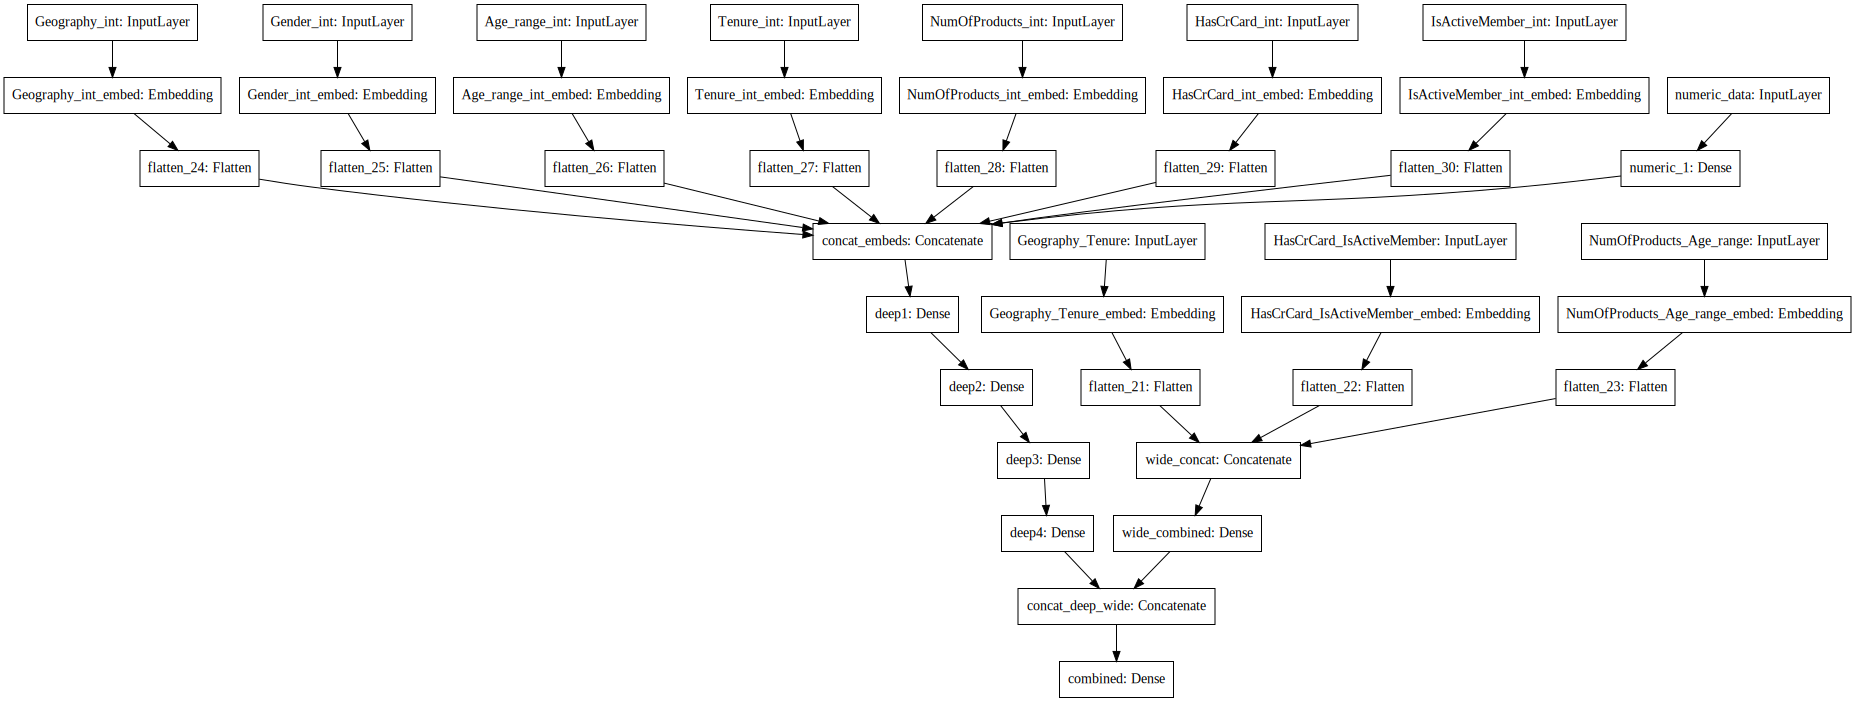

In [41]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model).create(prog='dot', format='svg'))

### Use cross validation to select the number of layers that performs superioly

In [42]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')

from keras.regularizers import l2
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import PReLU
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###  Stratified K fold

In [43]:
from sklearn.model_selection import StratifiedKFold
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True)
x_new = X_ints_train+ [X_train_num]
y_new = y_train
print("x_new.lenth: ", len(x_new))
print("y_new.lenth: ", len(y_new))
x_new[-2].shape
# for train_indices, val_indices in skf.split(x_new, y_new):
#     x_tmp_train = x_new[train_indices]
#     y_tmp_train = y_new[train_indices]
#     x_tmp_val = x_new[val_indices]
#     y_tmp_val = y_new[val_indices]
#     history = model.fit(x_tmp_train,
#                     y_tmp_train, 
#                     epochs=20, 
#                     batch_size=32, 
#                     verbose=1, 
#                     validation_data = (x_tmp_val, y_tmp_val))

x_new.lenth:  11
y_new.lenth:  8000


(8000,)

In [44]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['accuracy'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit(X_ints_train+ [X_train_num],
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = (X_ints_test + [X_test_num], y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 140us/step - loss: 0.1540 - acc: 0.7539 - val_loss: 0.1173 - val_acc: 0.8420
Epoch 2/10
8000/8000 [==============================] - 0s 58us/step - loss: 0.1144 - acc: 0.8466 - val_loss: 0.1121 - val_acc: 0.8495
Epoch 3/10
8000/8000 [==============================] - 0s 57us/step - loss: 0.1106 - acc: 0.8529 - val_loss: 0.1103 - val_acc: 0.8510
Epoch 4/10
8000/8000 [==============================] - 0s 60us/step - loss: 0.1089 - acc: 0.8550 - val_loss: 0.1080 - val_acc: 0.8585
Epoch 5/10
8000/8000 [==============================] - 0s 57us/step - loss: 0.1078 - acc: 0.8554 - val_loss: 0.1074 - val_acc: 0.8575
Epoch 6/10
8000/8000 [==============================] - 0s 57us/step - loss: 0.1067 - acc: 0.8575 - val_loss: 0.1068 - val_acc: 0.8590
Epoch 7/10
8000/8000 [==============================] - 0s 58us/step - loss: 0.1060 - acc: 0.8585 - val_loss: 0.1070 - val_acc: 0.8610
Epoch 

In [45]:
model.get_layer("Geography_Tenure_embed").get_weights()[0][0]

array([ 0.03638846,  0.03858273,  0.09871703, -0.05708408, -0.09901319],
      dtype=float32)

In [46]:
yhat = np.round(model.predict(X_ints_test + [X_test_num]))
print(mt.confusion_matrix(y_test,yhat), mt.f1_score(y_test,yhat,average='macro'))

[[1563   47]
 [ 234  156]] 0.7218305136087739


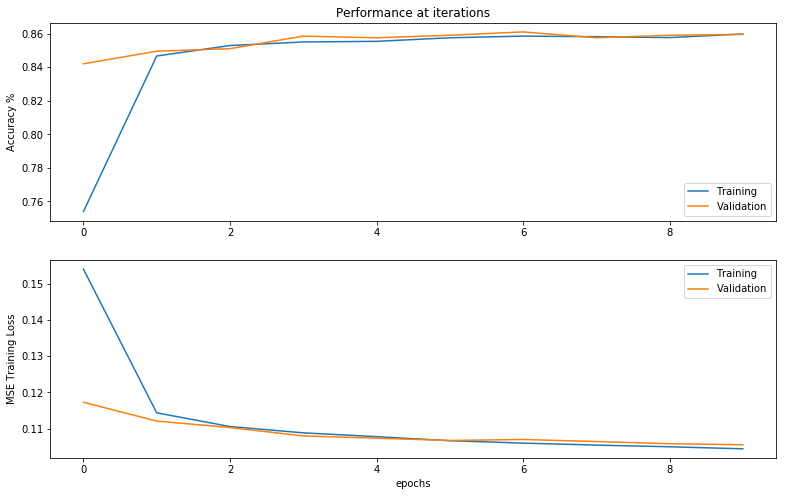

In [47]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(13,8))
plt.subplot(2,1,1)
plt.ylabel('Accuracy %')
plt.title('Performance at iterations')
plt.plot(history.history['acc'], label='Training')
plt.plot(history.history['val_acc'], label='Validation')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('MSE Training Loss')
plt.xlabel('epochs')
plt.legend()

# t-sne and visualizing

### - Age_range embedding weights

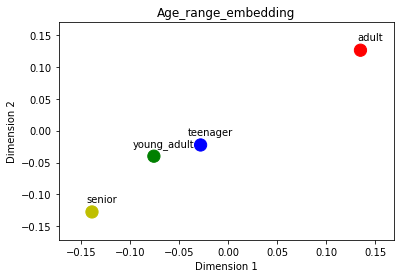

In [48]:
Age_range_int_embed = []
Age_range_weight = model.get_layer("Age_range_int_embed").get_weights()[0]

np.set_printoptions(suppress=True) # stop using scientific notation

age_range = encoders["Age_range"].classes_

# extract the x and y
x_list = Age_range_weight[:,0]
y_list = Age_range_weight[:,1]

index = 0

for x,y in zip(x_list, y_list):
    ar = age_range[index]
    plt.annotate(ar,# the label
                 xy=(x,y), # data
                 textcoords='offset points', # position of text
                 xytext=(10,10), # position offset of text
                ha='center')
    index += 1
    
c_value = ['r','y','b','g']
plt.scatter(x_list, y_list, s=150, c=c_value)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Age_range_embedding')
plt.show()

In this graph, we visualize different age range, including teenager, young adult, adult and senior. Since the weights here is 2-dimension originally, so we didn't do t-sne dimensionality reduction to it. As we can see, 'adult' and 'young adult' are both comparatively easier to distinguish themselves from others. But 'tenager' and 'senior' is a little bit closer, which means they are more similar, and it is not that easy to tell the difference between them.

### - Tenure_embedding weights

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.000s...
[t-SNE] Computed neighbors for 11 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.828568
[t-SNE] Error after 500 iterations: 0.268336


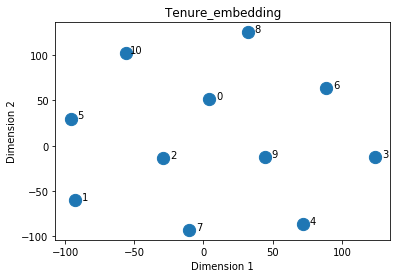

In [49]:
from sklearn.manifold import TSNE

Tenure_int_embed = []
Tenure_int_embed = model.get_layer("Tenure_int_embed").get_weights()[0]

tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)
tsne_result = tsne.fit_transform(Tenure_int_embed)
np.set_printoptions(suppress=True)

tenure = encoders["Tenure"].classes_

x_list = tsne_result[:,0]
y_list = tsne_result[:,1]

index = 0

for x,y in zip(x_list, y_list):
    tn = tenure[index]
    plt.annotate(tn,# the label
                 xy=(x,y), # data
                 textcoords='offset points', # position of text
                 xytext=(10,0), # position offset of text
                ha='center')
    index += 1
    
# c_value = ['r','y','b','g']
plt.scatter(x_list, y_list, s=150)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Tenure_embedding')
plt.show()

Since the Tenure embedding weights is 3-dimensions, we did t-sne dimensionality reduction and made it to 2 dimensions. From the graph above, all 11 different Tenure classes can be clearly identified.

### NumberOfProducts_embedding weights

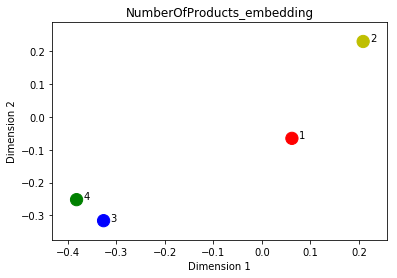

In [50]:
NumOfProducts_int_embed = []
NumOfProducts_int_embed = model.get_layer("NumOfProducts_int_embed").get_weights()[0]

# tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=500)
# tsne_result = tsne.fit_transform(NumOfProducts_int_embed)
np.set_printoptions(suppress=True)

numberofproducts = encoders["NumOfProducts"].classes_

x_list = NumOfProducts_int_embed[:,0]
y_list = NumOfProducts_int_embed[:,1]

index = 0

for x,y in zip(x_list, y_list):
    nop = numberofproducts[index]
    plt.annotate(nop,# the label
                 xy=(x,y), # data
                 textcoords='offset points', # position of text
                 xytext=(10,0), # position offset of text
                ha='center')
    index += 1
    
c_value = ['r','y','b','g']
plt.scatter(x_list, y_list, s=150, c=c_value)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('NumberOfProducts_embedding')
plt.show()

Since the NumberOfProduct embedding weights is also 2-dimension, we skip the t-sne process. Based on the plot result, they are some how distinguishable. '1' and '2' are obiviously different from others, but '4' and '3' are close to each other compared to other classes. It means that people who have 1 or 2 products are easier to be classified, but people who have 3 or 4 products are more likely to be identified as the same class.